In [3]:
!pip install scikit-image

     ---------------------------------------- 12.0/12.0 MB 9.8 MB/s eta 0:00:00
     -------------------------------------- 210.3/210.3 KB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 11.1 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Kankana Ghosh\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [12]:
import numpy as np
import pandas as pd
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from skimage import data
X = data.coins()
X.shape

(303, 384)

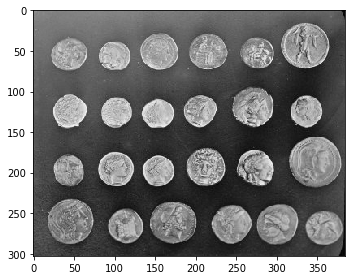

In [29]:
imshow(X,cmap='gray')

In [14]:
X

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

In [25]:
# SVD of a matrix A
U, s, VT = np.linalg.svd(X, full_matrices=False)
print(U.shape, s.shape,VT.shape)


(303, 303) (303,) (303, 384)


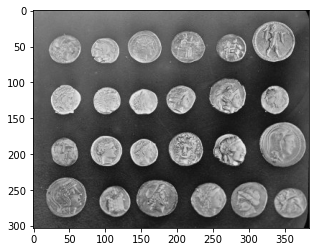

In [51]:
#dyad σ1u1v1^T
S=np.diag(s)
plt.clf()
#plt.imshow(U[:,1] @ S[:,1] @ VT[1,:], cmap='gray')
plt.imshow(U @ S @ VT, cmap='gray')

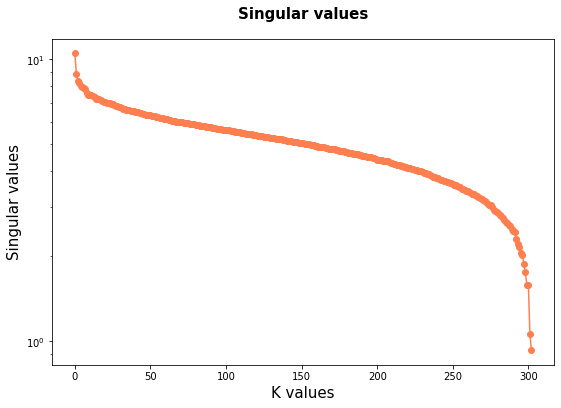

In [40]:
plt.figure(figsize = (9, 6))
plt.plot(np.log(s), color='coral', marker='o')
plt.title('Singular values',fontsize=15,weight="bold",pad=20)
plt.xlabel('K values' ,fontsize=15)
plt.ylabel('Singular values' ,fontsize=15)
plt.yscale('log')
plt.show()

1
2
3
4
5
10
20
50
100
200


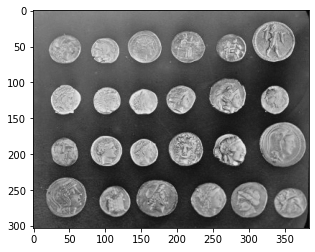

In [36]:
for k in [1, 2, 3, 4, 5, 10, 20, 50, 100, 200, 300]:
    plt.imshow(U[:, :k] @ np.diag(s[:k]) @ VT[:k, :], cmap='gray')
    plt.savefig(f'approximation_{k}.png')
    plt.clf()

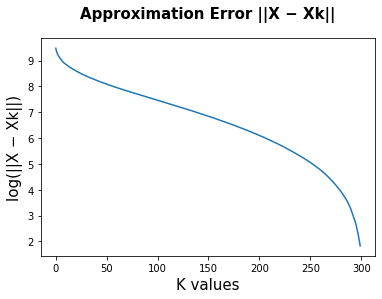

In [60]:
error = []
for k in range(1, 301):
    error.append(np.linalg.norm(X - U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]))
#print(error)
plt.plot(np.log(error))
#plt.plot(error)
plt.title('Approximation Error ||X − Xk||',fontsize=15,weight="bold",pad=20)
plt.xlabel('K values' ,fontsize=15)
plt.ylabel('log(||X − Xk||)' ,fontsize=15)
plt.show()
#plt.yscale('log')
# plt.savefig('error.png')
# plt.clf()

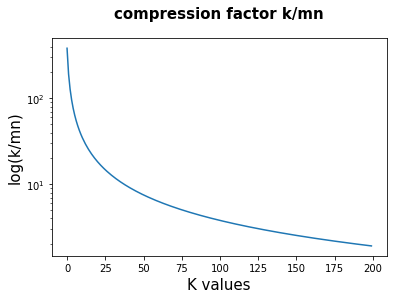

In [61]:
compression_factor = []
for k in range(1, 201):
    compression_factor.append(X.size / (k + k * X.shape[0]))
#print(compression_factor)
plt.plot(compression_factor)
#plt.plot(np.log(compression_factor))
plt.title('compression factor k/mn',fontsize=15,weight="bold",pad=20)
plt.xlabel('K values' ,fontsize=15)
plt.ylabel('log(k/mn)' ,fontsize=15)
plt.yscale('log')
#plt.savefig('compression_factor.png')